In [2]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original with control points


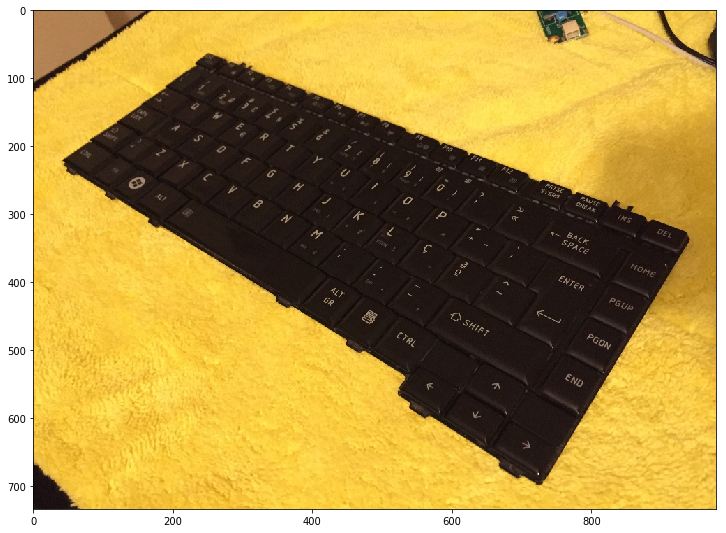

In [3]:
image = cv2.imread('./resources/keyboard.jpg')

cv2.imshow('Original with control points', image)

## Non-Affine Transform

Showing Image: Original


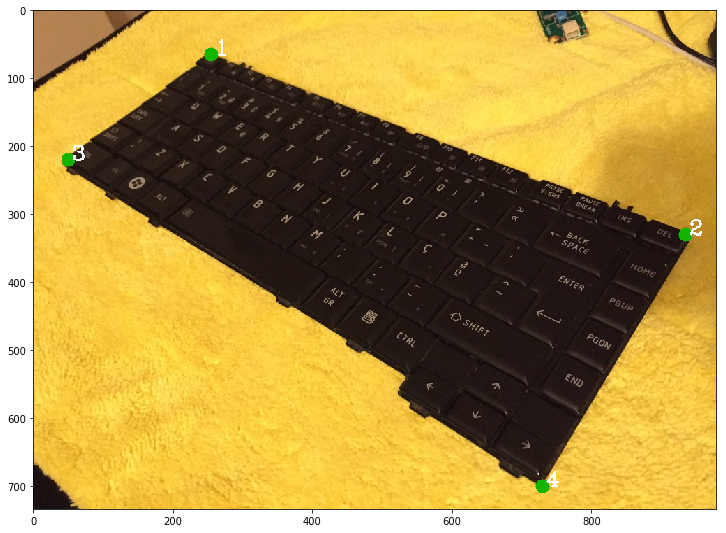

In [4]:
# Cordinates of the 4 corners of the original image
# they must be in a "Z" pattern (top-left>top-right>bottom-left>bottom-right)
points_A = np.float32([[255,65], [935,330], [50,220], [730,700]])

labelled_image = image.copy()

map(lambda x: cv2.circle(labelled_image, tuple(x), 10, (0,180,20), -1), points_A)
for i, (x,y) in enumerate(points_A):
    cv2.putText(labelled_image, str(i+1), (int(x+5),y), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)

cv2.imshow('Original', labelled_image)

Showing Image: warpPerspective


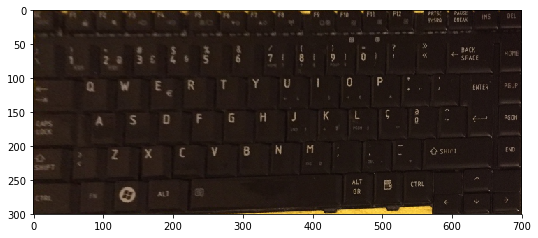

In [5]:

newimage_image_size = (700, 300)
# points_B are coordinates in pixel coordinates of the new image.
# These must follow the same rule for ordering.
points_B = np.float32([[0,0], [700,0], [0,300], [700,300]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(points_A, points_B)

warped = cv2.warpPerspective(image, transformation_matrix, newimage_image_size)
 
cv2.imshow('warpPerspective', warped)

## Affine Transform

Showing Image: Rectangle


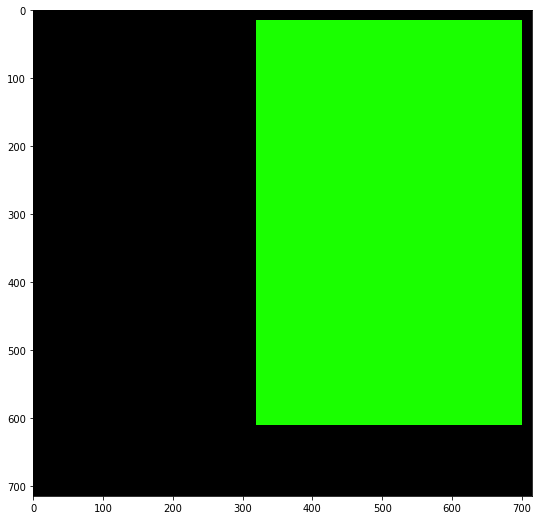

In [6]:
image = np.zeros((715, 715, 3)).astype(np.uint8)

cv2.rectangle(image, (320,15), (700,610), (0,255,26), -1)

cv2.imshow("Rectangle", image)

Showing Image: Original


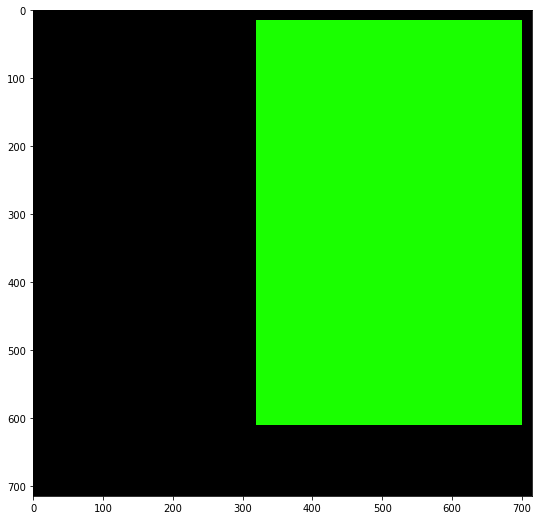

Showing Image: warpPerspective


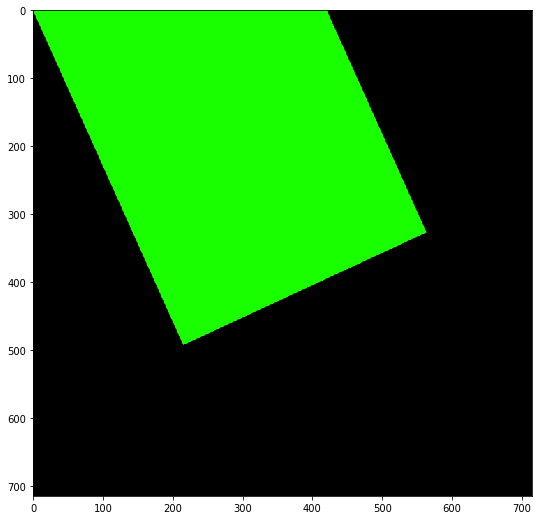

In [7]:
rows,cols,ch = image.shape

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610]])

# Cordinates of the 4 corners of the desired output
points_B = np.float32([[0,0], [420,0], [0,594]])
 

# here we are using Affine Transform, which maintains the paralelism 
# in the new image. This doesn't change "perspective".
M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()